In [75]:
import geopandas as gpd

COUNTRY_TAGS = [
        #'boundary',
        #'admin_level',
        'ISO3166-1',
        #'ISO3166-1:alpha2',
        #'ISO3166-1:alpha3',
        #'ISO3166-1:numeric',
        #'ISO3166-2',
        #'name:en',
        #'name',
        #'alt_name',
        #'wikidata',
        #'wikipedia',
        #'geometry',
]

borders = gpd.read_file('temp/country-borders-raw.geo.jsonseq', engine="pyogrio", columns=COUNTRY_TAGS)
borders

,ISO3166-1,geometry
0,None,"LINESTRING (14.82335 50.87057, 14.82273 50.870..."
1,None,"LINESTRING (14.85040 50.90941, 14.85062 50.909..."
2,None,"LINESTRING (14.87458 50.92852, 14.87486 50.929..."
3,None,"LINESTRING (11.67591 58.93513, 11.67586 58.935..."
4,None,"LINESTRING (34.70646 -11.18058, 34.70657 -11.1..."
...,...,...
34637,TM,"MULTIPOLYGON (((52.26435 41.61197, 52.26723 41..."
34638,IR,"MULTIPOLYGON (((44.03189 39.37173, 44.03205 39..."
34639,None,"LINESTRING (13.59112 45.88809, 13.59088 45.887..."
34640,SI,"MULTIPOLYGON (((13.37547 46.29770, 13.37584 46..."


In [76]:
borders = borders.dropna()
borders

,ISO3166-1,geometry
6624,BB,"MULTIPOLYGON (((-59.85621 13.30800, -59.85618 ..."
6626,JM,"MULTIPOLYGON (((-78.57824 18.26905, -78.57680 ..."
6645,NR,"MULTIPOLYGON (((166.70999 -0.53400, 166.71007 ..."
18574,IM,"MULTIPOLYGON (((-5.17073 54.05400, -5.17072 54..."
18615,SH,"MULTIPOLYGON (((-14.62269 -7.94100, -14.62264 ..."
...,...,...
34635,US,"MULTIPOLYGON (((-180.00000 51.79409, -179.9926..."
34637,TM,"MULTIPOLYGON (((52.26435 41.61197, 52.26723 41..."
34638,IR,"MULTIPOLYGON (((44.03189 39.37173, 44.03205 39..."
34640,SI,"MULTIPOLYGON (((13.37547 46.29770, 13.37584 46..."


In [77]:
import pandas as pd

URL = 'https://raw.githubusercontent.com/lukes/ISO-3166-Countries-with-Regional-Codes/master/all/all.csv'
# na_filter=False to avoid interpreting country code "NA" as numpy's NaN value
countries = pd.read_csv(URL, dtype=str, na_filter=False, usecols=['alpha-2', 'name', 'region', 'sub-region'])
countries.to_csv('countries.tsv', encoding='utf8', sep='\t', index=None)
countries

,name,alpha-2,region,sub-region
0,Afghanistan,AF,Asia,Southern Asia
1,Åland Islands,AX,Europe,Northern Europe
2,Albania,AL,Europe,Southern Europe
3,Algeria,DZ,Africa,Northern Africa
4,American Samoa,AS,Oceania,Polynesia
...,...,...,...,...
244,Wallis and Futuna,WF,Oceania,Polynesia
245,Western Sahara,EH,Africa,Northern Africa
246,Yemen,YE,Asia,Western Asia
247,Zambia,ZM,Africa,Sub-Saharan Africa


In [78]:
#merged_df = borders.merge(countries, left_on='ISO3166-1', right_on='alpha-2', how='outer', indicator=True)
#merged_df[merged_df['_merge'] != 'both']

borders = borders.merge(countries, left_on='ISO3166-1', right_on='alpha-2').drop(columns=['alpha-2'])
borders

,ISO3166-1,geometry,name,region,sub-region
0,BB,"MULTIPOLYGON (((-59.85621 13.30800, -59.85618 ...",Barbados,Americas,Latin America and the Caribbean
1,JM,"MULTIPOLYGON (((-78.57824 18.26905, -78.57680 ...",Jamaica,Americas,Latin America and the Caribbean
2,NR,"MULTIPOLYGON (((166.70999 -0.53400, 166.71007 ...",Nauru,Oceania,Micronesia
3,IM,"MULTIPOLYGON (((-5.17073 54.05400, -5.17072 54...",Isle of Man,Europe,Northern Europe
4,SH,"MULTIPOLYGON (((-14.62269 -7.94100, -14.62264 ...","Saint Helena, Ascension and Tristan da Cunha",Africa,Sub-Saharan Africa
...,...,...,...,...,...
211,US,"MULTIPOLYGON (((-180.00000 51.79409, -179.9926...",United States of America,Americas,Northern America
212,TM,"MULTIPOLYGON (((52.26435 41.61197, 52.26723 41...",Turkmenistan,Asia,Central Asia
213,IR,"MULTIPOLYGON (((44.03189 39.37173, 44.03205 39...",Iran (Islamic Republic of),Asia,Southern Asia
214,SI,"MULTIPOLYGON (((13.37547 46.29770, 13.37584 46...",Slovenia,Europe,Southern Europe


<Axes: >

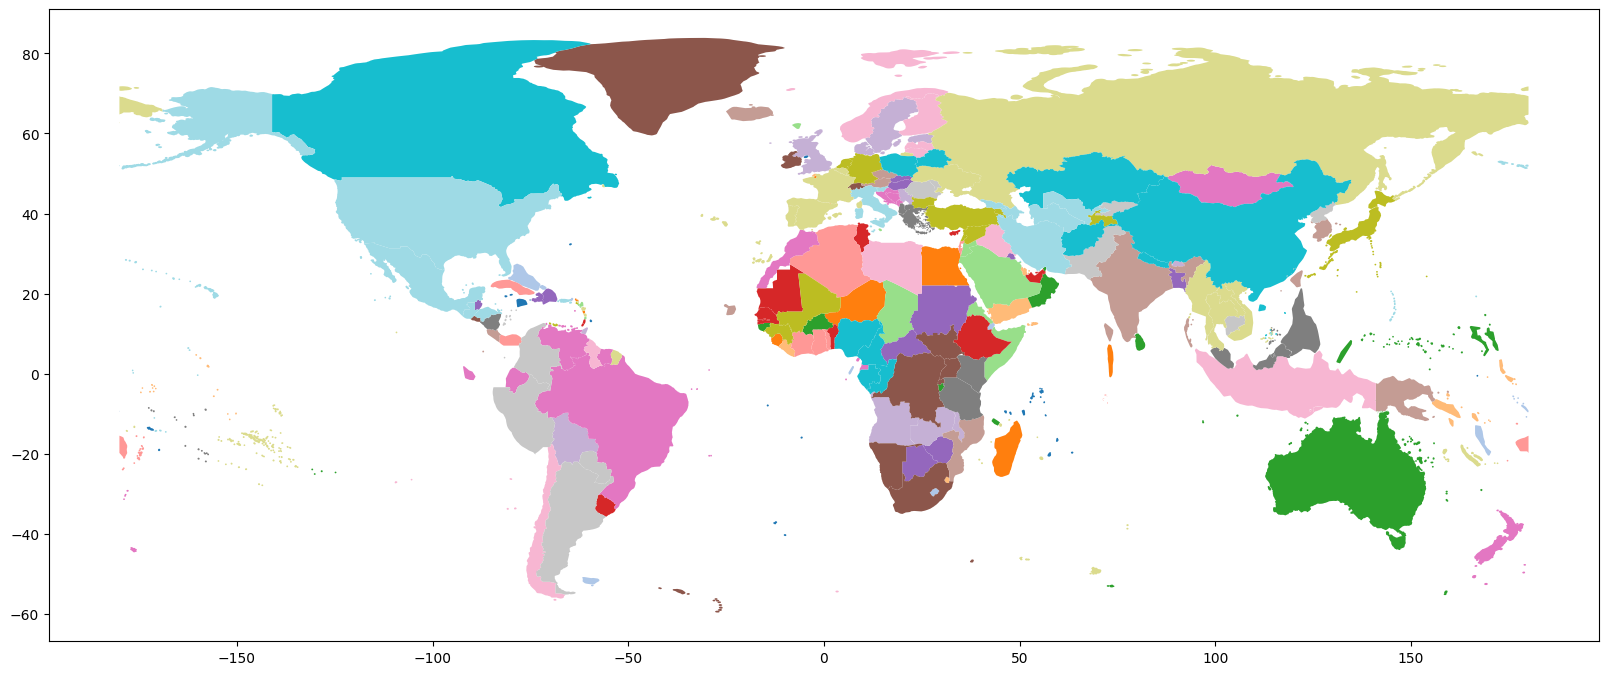

In [79]:
borders.plot(figsize=(20,20), cmap='tab20')

<Axes: >

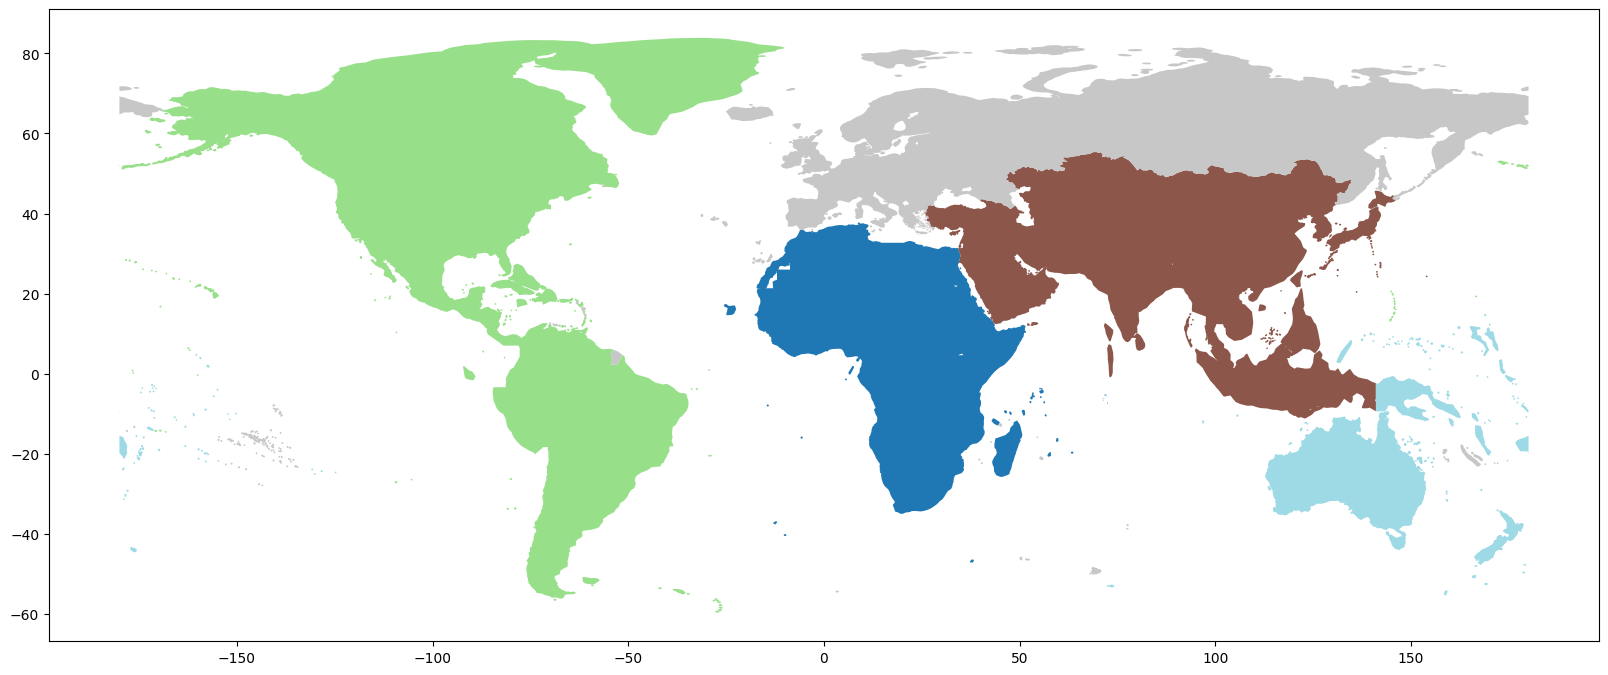

In [81]:
regions = borders[['ISO3166-1','region','geometry']].dissolve(by='region', aggfunc=';'.join).reset_index()
regions.plot(figsize=(20,20), cmap='tab20')

In [82]:
regions

,region,geometry,ISO3166-1
0,Africa,"MULTIPOLYGON (((-10.27708 -40.27700, -10.27563...",SH;MU;SC;DJ;ST;LS;NE;SL;MG;EG;LR;SZ;KM;GW;BF;B...
1,Americas,"MULTIPOLYGON (((-109.67477 -27.16000, -109.673...",BB;JM;BM;KY;VG;FK;BS;TC;DM;AI;KN;MS;AG;LC;VC;G...
2,Asia,"MULTIPOLYGON (((51.92738 12.42447, 51.92871 12...",MV;BH;QA;YE;LK;OM;SA;JO;CY;AE;IL;KW;BD;BT;KR;T...
3,Europe,"MULTIPOLYGON (((-143.70489 -27.78659, -143.694...",IM;GI;LI;AD;JE;MC;MC;GG;SM;VA;FO;MT;HU;SK;DK;S...
4,Oceania,"MULTIPOLYGON (((-177.24251 -43.87831, -177.241...",NR;WS;NU;TV;VU;KI;SB;PW;PN;AU;MH;FM;TO;FJ;PG;N...


In [151]:
sub_regions = borders[['ISO3166-1','sub-region','geometry']].dissolve(by='sub-region', aggfunc=';'.join).reset_index()
sub_regions.plot(figsize=(20,20), cmap='tab20')

In [150]:
from shapely.geometry import box
bbox = box(-180, -90, +180, +90)

sub_regions['geometry'] = sub_regions['geometry'].buffer(1).simplify(1).clip(bbox)
#sub_regions.geometry.concave_hull.plot(cmap='tab20', figsize=(20,20))
sub_regions.plot(cmap='tab20', figsize=(20,20))

/tmp/ipykernel_125669/280729463.py:4: UserWarning: Geometry is in a geographic CRS. Results from 'buffer' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  sub_regions['geometry'] = sub_regions['geometry'].buffer(1).simplify(2).clip(bbox)


GEOSException: TopologyException: Input geom 0 is invalid: Hole lies outside shell at 49.075310094461123 30.943031433766482

In [132]:
sub_regions

,sub-region,geometry,ISO3166-1
0,Australia and New Zealand,"MULTIPOLYGON (((72.25211 -52.98368, 72.25469 -...",AU;NZ
1,Central Asia,"POLYGON ((67.78514 37.18767, 67.77978 37.19134...",KG;TJ;KZ;UZ;TM
2,Eastern Asia,"MULTIPOLYGON (((112.70577 9.02137, 112.70688 9...",KR;TW;MN;KP;JP;CN
3,Eastern Europe,"MULTIPOLYGON (((28.85442 43.70656, 28.85375 43...",HU;SK;CZ;MD;RO;BG;UA;RU;PL;BY
4,Latin America and the Caribbean,"MULTIPOLYGON (((-81.07319 -33.71100, -81.07212...",BB;JM;KY;VG;FK;BS;TC;DM;AI;KN;MS;AG;LC;VC;GD;U...
5,Melanesia,"MULTIPOLYGON (((-180.00000 -19.10105, -180.000...",VU;SB;FJ;PG
6,Micronesia,"MULTIPOLYGON (((-152.02971 -11.40500, -152.029...",NR;KI;PW;MH;FM
7,Northern Africa,"MULTIPOLYGON (((37.09351 21.98993, 37.09656 21...",EG;TN;DZ;SD;MA;LY
8,Northern America,"MULTIPOLYGON (((-168.37845 -14.53587, -168.378...",BM;GL;CA;US
9,Northern Europe,"MULTIPOLYGON (((2.93629 -54.38400, 2.93703 -54...",IM;JE;GG;FO;DK;SE;EE;GB;IE;IS;NO;FI;LV;LT


In [147]:
import json
from tqdm import tqdm

extracts = []

for index in tqdm(range(len(sub_regions))):
    row = sub_regions.iloc[index]
    SR = row['sub-region']
    #print(SR)
    
    sub_regions.iloc[[index]].to_file(f"temp/{SR}.borders.geojson")

    extracts.append({
        'output': f'temp/{SR}.osm.pbf',
        'output_format': 'pbf',
        'multipolygon': {
            "file_name": f"{SR}.borders.geojson", # Path relative to config!
            "file_type": "geojson"
        }
    })

config = {
    "extracts": extracts
}

fp = open('temp/extracts-into-sub-regions.json', 'wt', encoding='UTF8')
json.dump(config, fp, sort_keys=True, indent=4, ensure_ascii=False)
fp.close()

100%|██████████| 17/17 [00:00<00:00, 95.39it/s]


In [148]:
# Beware, this line splits the planet in multiple sub-regions and takes hours
!osmium extract --overwrite --strategy=simple --config='temp/extracts-into-sub-regions.json' planet-*.osm.pbf

^C>                                                                    ]   2% 


In [ ]:
import json
from tqdm import tqdm

for index in tqdm(range(len(borders))):
    row = borders.iloc[index]
    CC = row['ISO3166-1']
    print(CC)

    borders.iloc[[index]].to_file(f"extracts/{CC}.borders.geojson")

In [ ]:
import json
from tqdm import tqdm

extracts = {}

for index,row in sub_regions.iterrows():
    SR = row['sub-region']
    extracts = []

    for CC in row['ISO3166-1'].split(';'):
        extracts.append({
            'output': f'extracts/{CC}.osm.pbf',
            'output_format': 'pbf',
            'output_header': {
                'generator': 'https://openstreetdata.org'
            },
            'multipolygon': {
                "file_name": f"../extracts/{CC}.borders.geojson", # relative to config file
                "file_type": "geojson"
            }
        })

    config = {
        "extracts": extracts
    }

    fp = open(f'temp/extracts-config-{SR}.json', 'wt', encoding='UTF8')
    json.dump(config, fp, sort_keys=True, indent=4, ensure_ascii=False)
    fp.close()

In [ ]:
!for config in "temp/extracts-config-*.json"; do
!    osmium extract --overwrite --strategy=simple --config="${config}" planet-*.osm.pbf
